# Loan Application Status Prediction

# Project Description
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc


Dataset Link-  https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv

# Import Libraries

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler
from warnings import filterwarnings
filterwarnings(action='ignore')


In [3]:
df=pd.read_csv('C:/Users/HP/Desktop/Learning-2023/DSData/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [7]:
df.shape

(614, 13)

To print the information of the dataset, we can use info() method

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


To get values like the mean, count and min of the column we can use describe() method.

In [9]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [11]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

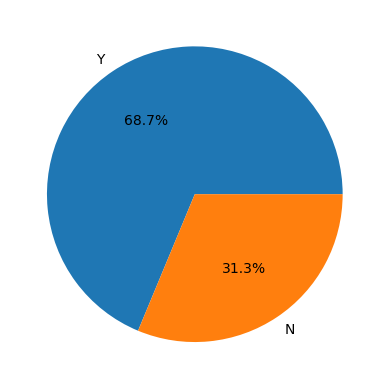

In [14]:
temp = df['Loan_Status'].value_counts()
plt.pie(temp.values,
        labels=temp.index,
        autopct='%1.1f%%')
plt.show()

we have an imbalanced dataset. We will have to balance it before training any model on this data.

AttributeError: 'DataFrame' object has no attribute 'distplot'

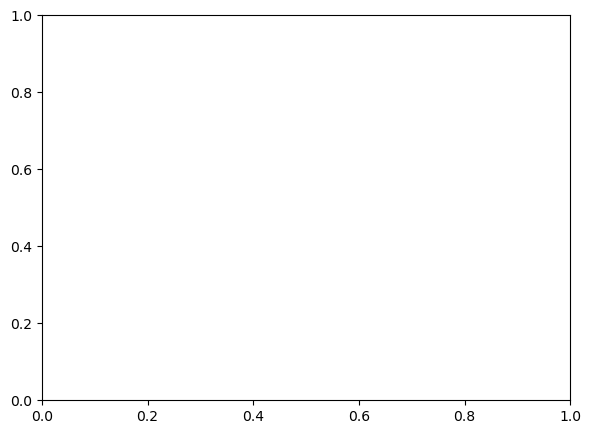

In [19]:
plt.subplots(figsize=(15, 5))
for i, col in enumerate(['ApplicantIncome', 'LoanAmount']):
    plt.subplot(1, 2, i+1)
    df.distplot(df[col])
plt.tight_layout()
plt.show()

In [20]:
df = df[df['ApplicantIncome'] < 25000]
df = df[df['LoanAmount'] < 400000]

In [21]:
df.groupby('Gender').mean()['LoanAmount']

Gender
Female    126.697248
Male      146.924569
Name: LoanAmount, dtype: float64

The loan amount requested by males is higher than what is requested by females.

In [22]:
df.groupby(['Married', 'Gender']).mean()['LoanAmount']


Married  Gender
No       Female    116.115385
         Male      135.959677
Yes      Female    153.322581
         Male      150.875740
Name: LoanAmount, dtype: float64

In [30]:
col_names= df.columns.tolist()
for column in col_names:
  print("value of null <{0}>: <{1}>".format(column,df[column].isnull().sum()))

value of null <Loan_ID>: <0>
value of null <Gender>: <12>
value of null <Married>: <2>
value of null <Dependents>: <13>
value of null <Education>: <0>
value of null <Self_Employed>: <30>
value of null <ApplicantIncome>: <0>
value of null <CoapplicantIncome>: <0>
value of null <LoanAmount>: <0>
value of null <Loan_Amount_Term>: <14>
value of null <Credit_History>: <49>
value of null <Property_Area>: <0>
value of null <Loan_Status>: <0>


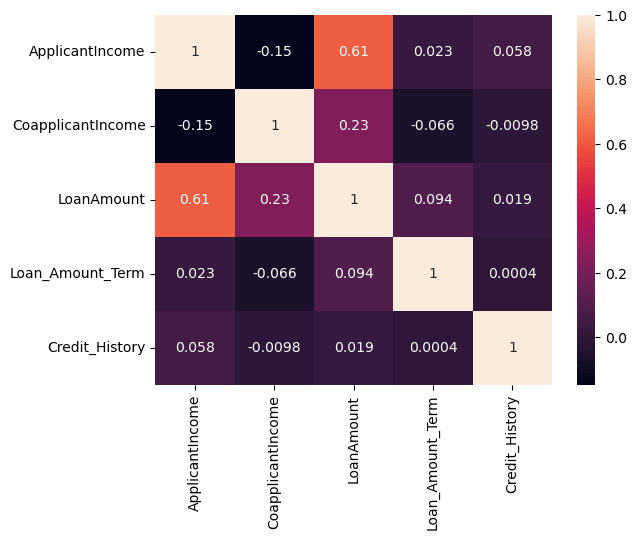

In [31]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [38]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [44]:
df.Gender=df.Gender.map({'Male':1,'Female':0})
df.Gender.value_counts()

1.0    464
0.0    109
Name: Gender, dtype: int64

In [45]:
df.Dependents.dtypes

dtype('O')

In [47]:
df.Married=df.Married.map({'Yes':1,'No':0})

In [48]:
df.Married.value_counts()

1.0    378
0.0    205
Name: Married, dtype: int64

In [50]:
df.Dependents=df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [51]:
df.Dependents.value_counts()

0.0    332
2.0     98
1.0     96
3.0     46
Name: Dependents, dtype: int64

<Axes: >

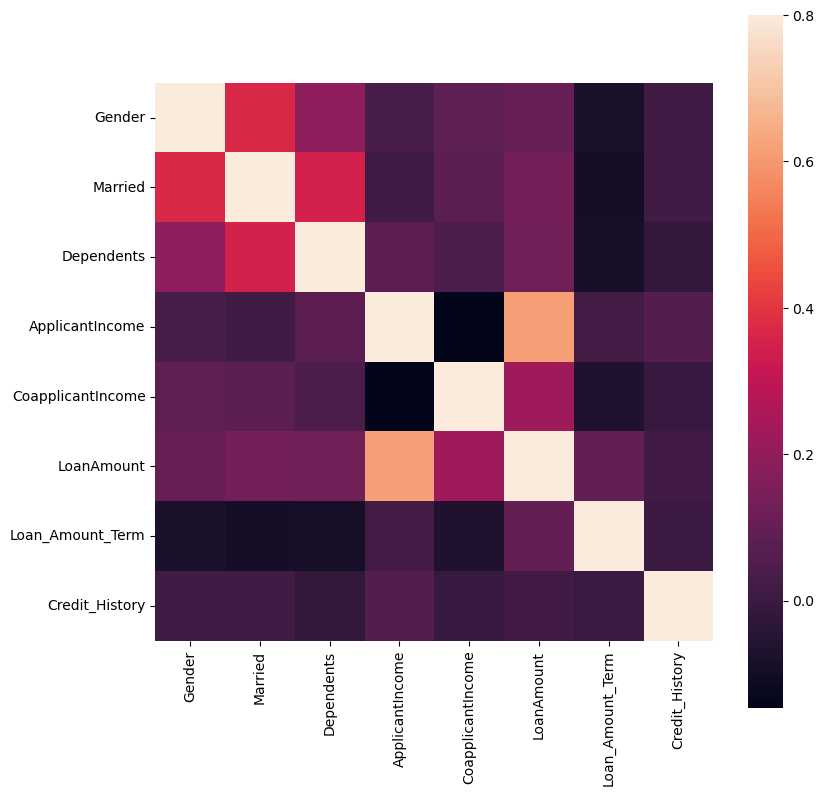

In [52]:
corrmat=df.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

<Axes: >

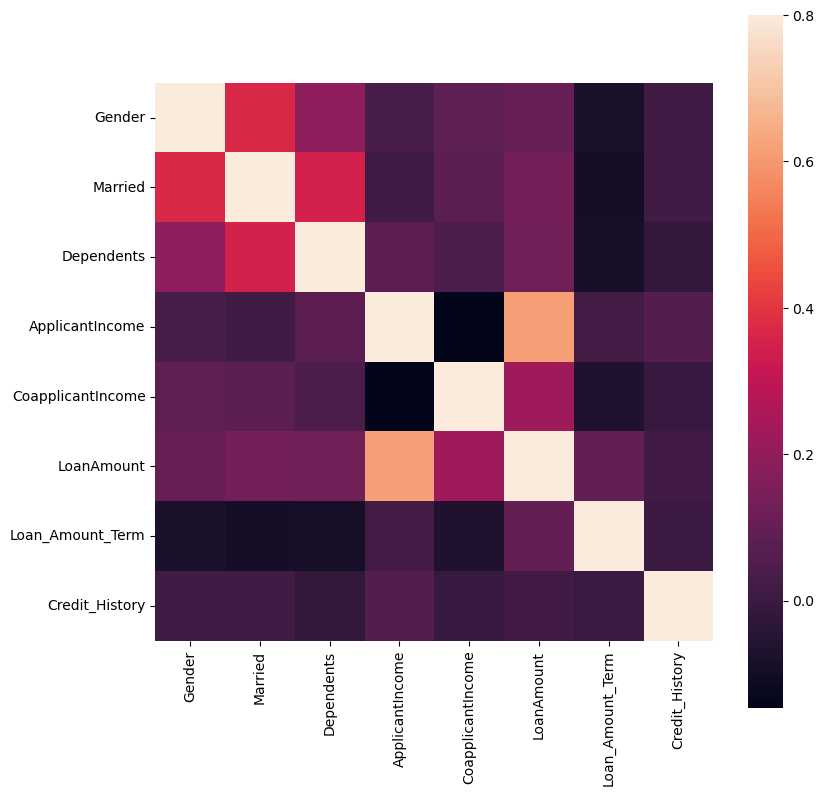

In [53]:
corrmat=df.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

In [54]:
df.Education=df.Education.map({'Graduate':1,'Not Graduate':0})

In [55]:
df.Education.value_counts()

1    458
0    127
Name: Education, dtype: int64

In [57]:
df.Self_Employed=df.Self_Employed.map({'Yes':1,'No':0})

In [58]:
df.Self_Employed.value_counts()

0.0    477
1.0     78
Name: Self_Employed, dtype: int64

In [59]:
df.Property_Area.value_counts()

Semiurban    224
Urban        189
Rural        172
Name: Property_Area, dtype: int64

In [60]:
df.Property_Area=df.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})

In [61]:
df.Property_Area.value_counts()

1    224
2    189
0    172
Name: Property_Area, dtype: int64

<Axes: >

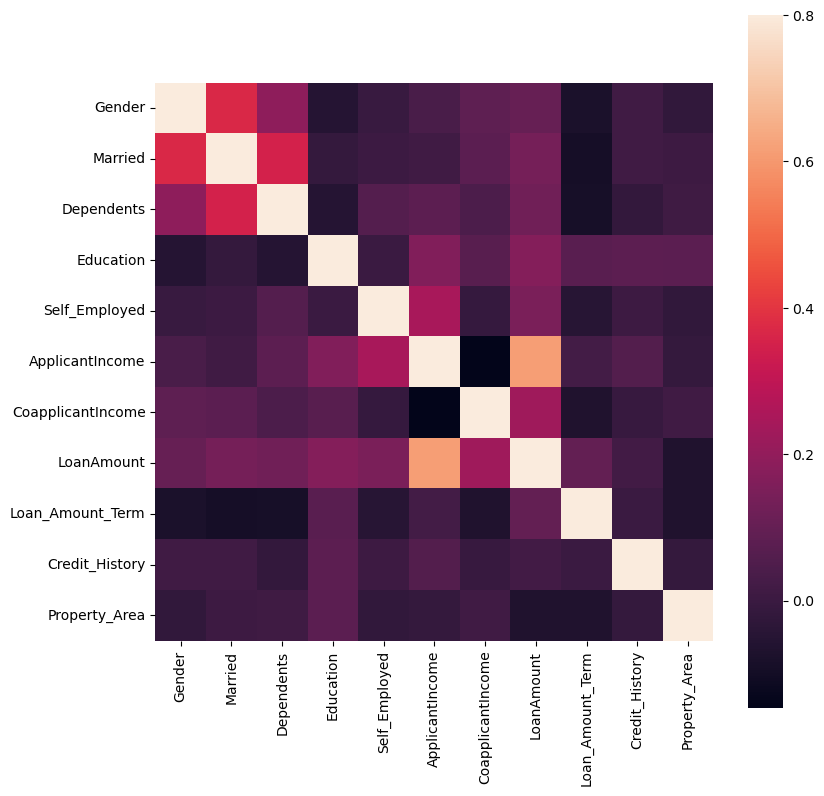

In [62]:
corrmat=df.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

In [63]:
df.Credit_History.size

585

In [68]:
df_output.head()

""
